# MODULO II - Modelos de Regresión

<br>
<font size="4">
<p>
Los modelos de regresión son procesos estadísticos que aprovechan las relaciones entre las variables de un fenomeno estocástico para entimar los parámetros que modelan dichar relaciones.
</p>
<p>Esto nos ayuda a entender cómo el valor de la variable varía al cambiar el valor de otras.
</p>
</font>

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.optimize as optimize
from sklearn.linear_model import LinearRegression, LogisticRegression
from matplotlib import pyplot as plt

## Regresión Lineal

<br>
<font size="4">
<p>
La regresión lineal (ajuste lineal) es un modelo matemático que aproxima la relación de dependencia entre una variable dependiente Y, y la variables independientes X más un término aleatorio ε. 
</p>
<p>
El producto de la regresión es la estimación de una función función de regresión dependiente de X. Con base en ésta función estimada se pueden hacer predicciones sobre eventos futuros ya que las variables están correlacionadas por medios de la función estimada.
</p>
<p>Se asume que la funcion va a tomar la siguiente forma lineal:</p>
<br>

$
F(x) = \beta_0 + \beta_1 * x
$

<br>
<p>Los valores que se deben estimar por lo tanto son los Betas ($ \beta_0, \beta_1 $) que acompañan la variable independiente $x$.
</p>
<br>
<p>Uno de los métodos más usados para dar con éstos parámetros es el método de mínimos cuadrados -<i>más adelante se explicará éste método</i>-.</p>
<br>

### Ejemplo con datos sintéticos
<br>

<font size="4">

<p>
Para entender mejor la regresión lineal vamos a generar unos datos de prueba basados en una función y le agregamos un poco de ruido. 
</p>


$
y = 5 + 2x
$


<p>El objetivo por ende será encontrar los parámetros de la función lineal que predigan los valores futuros</p>

In [2]:
f_original = lambda  x: 2*x + 5

In [3]:
x_original = np.linspace(0,50,100)
y_original = [ f_original(x_i) for x_i in x_original ] 
noise = np.random.normal(0, 10, 100)
y_original = y_original+noise

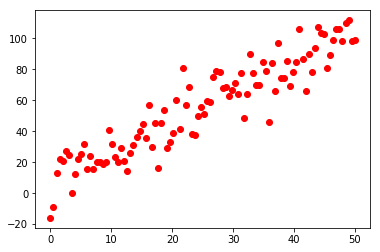

In [4]:
plt.plot(x_original, y_original, 'ro')

### Minimos cuadrados

<br>
<font size="4">
<p>
Este método consiste en minimizar la suma de cuadrados de las diferencias entre los puntos originales y_original y la función que se está calculando. </p>
<p>Requiere un gran número de iteraciones para converger, al reducir el cuadrado de la distancia entre los valores estimados y los valores reales (S).
</p>
<br>
$
S = \sum (y_i - f(x_i))^2
$
<br>
<p>

In [9]:
b1, b0 = np.linalg.lstsq(np.vstack([x_original, np.ones(len(x_original))]).T, y_original)[0]
print('Los valores para (b0, b1) son = ({:.3f}, {:.3f})'.format(b0,b1))

Los valores para (b0, b1) son = (7.198, 1.953)


<font size="4">
<p>
Una vez obtenidos los valores estimados de $\beta_0 $ y $\beta_1$ para la función $f(x) = \beta_0 + \beta_1 * x$, se puede graficar la aproximación lineal.
</p>

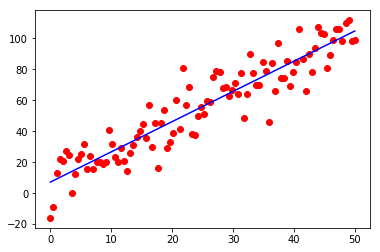

In [10]:
plt.plot(x_original, y_original, 'ro', label='Data Original')
plt.plot(x_original, b0 + b1*x_original, 'b', label='Aproximacion', markersize=10)

### Ejemplo Predicción Precio Vivienda

<br>
<font size="4">
<p>
 En este tutorial se ajustará un modelo para predecir la mediana del precio de las casas en un sector teniendo en cuenta caracteristicas relacionadas a sus condiciones.
<p>

## Carga de datos

 Los datos se pueden descargar de [Kaggle](https://www.kaggle.com/apratim87/housingdata).
 El conjunto de datos tiene 14 variables.
  - CRIM     Tasa de crimen per capita en la ciudad
  - ZN       Proporción de tierra residencial zonificada para lotes de más de 25,000 pies cuadrados.
  - INDUS    Proporción de [acres](https://es.wikipedia.org/wiki/Acre_%28unidad_de_superficie%29) no comerciales por ciudad
  - CHAS     1 si el tramo bordea el río, 0 de lo contrario
  - NOX      Concentración de óxidos nítricos (partes por 10 millones)
  - RM       Número medio de habitaciones por vivienda
  - AGE      Proporción de unidades ocupadas por el propietario construidas antes de 1940
  - DIS      Distancias ponderadas a cinco centros de empleo de Boston
  - RAD      Índice de accesibilidad a las autopistas radiales
  - TAX      Tasa de impuesto a la propiedad de valor completo por 10.000 USD
  - PTRATIO  Relación alumno-profesor por ciudad
  - B        $1000(Bk - 0.63)^2$ donde $Bk$ es la proporción de población negra en la ciudad
  - LSTAT    % de población de estratos bajos
  - MEDV     Mediana del precio las casas ocupadas por sus dueños. En miles de dólares.


<br>
<font size="4">
<p> El comando ```read_csv``` permite cargar un archivo csv y asignarle nombres a cada columna.
</p>
</font>

In [8]:
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
         'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv('datasets/housingdata.csv', names=names)

<br>
<font size="4">
<p>Es posible visualizar los datos de un objeto ```DataFrame```:</p>
</font>

In [9]:
df.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
5  394.12   5.21  28.7  
6  395.60  12.43  22.9  
7  396.90  19.15  27.1  
8  386.63  29.93  16.5  
9  386.71  17.10  18.9

<br>
<font size="4">
<p>Las primeras 13 variables serán las variables de entrada, la última será nuestra variable de salida.
</p>
</font>

In [10]:
X = df[names[:-1]]
y = df[names[-1]]

## Entrenar el modelo de regresión

<br>
<font size="4">
<p>
Usaremos la librería que estima los parámetros de nuestra regresión ($\hat{y} = Xw + b$)
</p>
</font>

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

<br>
<font size="4">
<p>Para estimar nuestro error de predicción usamos la función ```score```</p>
</font>

In [11]:
print(model.score(X, y))

NameError: name 'model' is not defined

## Predicción y visualización

<br>
<font size="4">
<p>Con el modelo entrenado es posible obtener las predicciones del modelo usando la función ```predict```
</p>
</font>

In [13]:
y_hat = model.predict(X)

<br>
<font size="4">
<p>El siguiente código visualiza los datos reales y la predicción </p>
<font>

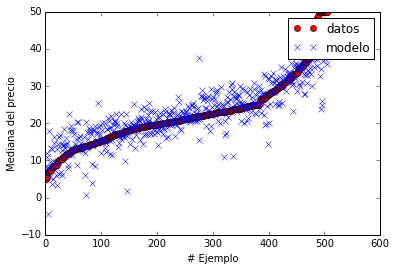

In [14]:
plt.figure()
idx_sort = y.argsort()
plt.plot(range(len(idx_sort)), y[idx_sort], 'ro')
plt.plot(range(len(idx_sort)), y_hat[idx_sort], 'bx')
plt.legend(['datos', 'modelo'])
plt.ylabel('Mediana del precio')
plt.xlabel('# Ejemplo')

# Regresión logística


<br>
<font size="4">
<p>La regresión logística es utilizada para predecir el resultado de una variable categórica (una variable no continua que describe 1 o varias clases) en función de las variables independientes X.
<p>
<p>Es útil para modelar la probabilidad de un evento ocurriendo como función de otros factores.<p>
<p>Las probabilidades que describen el posible resultado de un único ensayo se modelan, como una función de variables explicativas, utilizando una función logística.
<p>
<font>

## Ejemplo 1

<br>
<font size="4">
<p>En una empresa se tienen los datos históricos de los ingresos a la compañía.</p>
<p>A cada persona que aplica se le hacen dos exámenes "Prueba Técnica" y "Prueba Psicotécnica", dependiendo de las calificaciones en cada prueba el candidato es aceptado o rechazado.</p>
<p>El objetivo es obtener un modelo que permita predecir la probabilidad que tiene un candidato de ser aceptado</p>
</font>

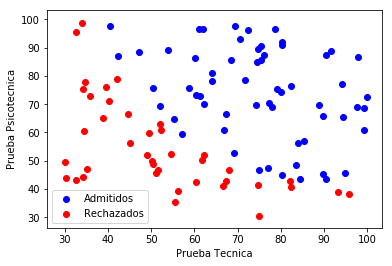

In [12]:
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

#Leyendo los datos
data = loadtxt('datasets/logitdata1.txt', delimiter=',')

X = data[:, 0:2]
y = data[:, 2]

pos = where(y == 1)
neg = where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='o', c='r')
xlabel('Prueba Tecnica')
ylabel('Prueba Psicotecnica')
legend(['Admitidos', 'Rechazados'])
show()

In [13]:
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(X, y)

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
print(clf.intercept_, clf.coef_)

[-24.95604647] [[ 0.20459008  0.19981009]]


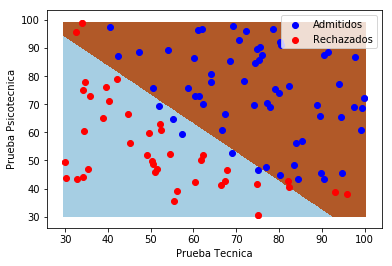

In [15]:
pos = where(y == 1)
neg = where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='o', c='r')
xlabel('Prueba Tecnica')
ylabel('Prueba Psicotecnica')
legend(['Admitidos', 'Rechazados'])

# Dibujar las regiones de decision
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

#imprimir puntos iniciales
pos = where(y == 1)
neg = where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='o', c='r')
xlabel('Prueba Tecnica')
ylabel('Prueba Psicotecnica')
legend(['Admitidos', 'Rechazados'])
show()

## Ejemplo 2

<br>
<font size="4">
<p>
En la segunda parte vamos a entrenar un modelo de clasificación usando regresión logística. Usaremos el conjunto de datos Iris. Tiene 150 registros de las dimensiones del pétalo y sépalo de flores. El objetivo es clasificar dichas flores en tres clases: Setosa, Versicolor y Virginica.
</p>
<p>
Iris viene preinstalado con el paquete sklearn, así que podemos cargarlo directamente desde la libreria:
</p>
</font>

In [17]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

<br>
<font size="4">
<p>Podemos visualizar los nombres de las características del dataset</p>
</font>

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [19]:
irisPd = pd.DataFrame(X, columns=iris.feature_names)
irisPd.head(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1

## Entrenar el modelo de clasificación
<br>
<font size="4">
<p>El proceso de entrenamiento es similar al usado en regresión lineal:</p>
</font>

In [32]:
model = LogisticRegression(C=0.2)
model.fit(X, y)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<br>
<font size="4">
<p>Para estimar nuestro porcentaje de precision en la predicción usamos la función ```score```</p>
</font>

In [33]:
print(model.score(X, y))

0.913333333333


## Predicción y visualización
<br>
<font size="4">
<p>Con el modelo entrenado es posible obtener las predicciones del modelo usando la función ```predict```
</p>
</font>

In [26]:
y_hat = model.predict(X)

<br>
<font size="4">
<p>Usaremos las 2 primeras características para visualizar las predicciones del modelo.</p>
</font>

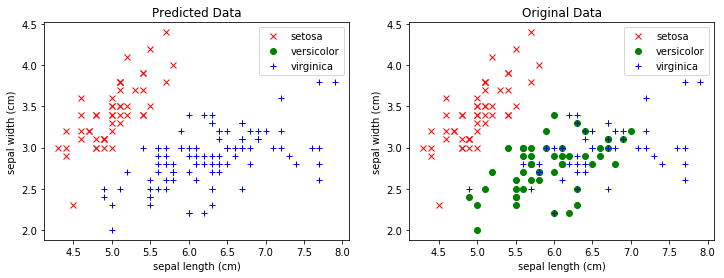

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
icons = ['rx', 'go', 'b+']
for i, icon in enumerate(icons):
    samples = y_hat == i
    plt.plot(X[samples,0], X[samples,1], icon)
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Predicted Data')

plt.subplot(122)
icons = ['rx', 'go', 'b+']
for i, icon in enumerate(icons):
    samples = y == i
    plt.plot(X[samples,0], X[samples,1], icon)
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Original Data')

plt.show()

# Taller

## Regresión lineal
<br>
<font size="4">
<p>
Entrenar un modelo de regresión para el conjunto de datos [Bridge risk](http://www.stat.ufl.edu/~winner/data/bridge_risk.txt). Son datos para 66 puentes en Gran Bretaña, con las siguientes características:
</p>

 - Riesgo de Seguridad (SRR)
 - Rating de Riesgo de Funcionalidad (FRR)
 - Rating de Riesgo de Sostenibilidad (SUR)
 - Riesgo de Medio Ambiente (ERR).
<p>
Cada uno con valores: 3 = Alto, 2 = Medio, 1 = Bajo, 0 = Ninguno. La variable de salida  es Puntuación de Riesgo (RISK), una medida de prioridad de mantenimiento del puente.
</p>

In [149]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

import pandas as pd

data=StringIO("""SRR,FRR,SUR,ERR,RISK
3,3,3,3,99
3,3,3,2,98
3,2,3,3,98
3,2,2,3,97
3,3,2,2,97
3,2,2,2,96
3,3,3,0,96
3,2,3,0,95
3,3,2,0,95
3,2,2,0,94
3,0,2,2,92
3,0,3,0,91
2,3,3,2,85
2,3,2,2,84
2,3,3,0,83
2,3,2,0,82
2,2,3,3,73
2,2,3,2,72
2,2,3,0,70
2,0,3,2,68
0,2,3,2,67
2,0,3,0,66
0,2,3,0,65
0,0,3,3,64
0,0,3,2,63
0,0,3,0,61
2,2,2,2,59
2,2,2,1,58
2,2,2,0,57
2,1,1,1,56
1,1,1,0,56
2,2,0,1,55
2,1,1,0,55
2,0,2,2,55
2,0,1,2,54
2,2,0,0,54
2,0,2,0,53
2,0,0,2,52
2,0,0,0,50
1,1,2,1,46
1,2,1,1,46
1,2,2,0,46
1,1,1,1,45
1,2,1,0,45
1,1,1,0,44
1,1,0,1,43
1,1,0,0,42
1,0,1,1,42
1,0,2,0,42
1,0,1,0,41
1,0,0,1,40
1,0,0,0,39
0,2,2,2,37
0,2,2,0,35
0,2,0,2,34
0,0,2,3,28
0,1,2,0,28
0,0,2,2,27
0,0,2,1,26
0,0,2,0,25
0,1,1,1,17
0,1,1,0,16
0,0,1,1,12
0,0,1,0,11
0,0,0,2,10
0,0,0,1,5
    """)

testDf = pd.read_csv(data, sep=",")

In [150]:
testDf.head(10)

SRR  FRR  SUR  ERR  RISK
0    3    3    3    3    99
1    3    3    3    2    98
2    3    2    3    3    98
3    3    2    2    3    97
4    3    3    2    2    97
5    3    2    2    2    96
6    3    3    3    0    96
7    3    2    3    0    95
8    3    3    2    0    95
9    3    2    2    0    94

Resuelva los siguientes puntos:
 1. Extraiga las variables de entrada $X$ y la variable de salida $y$
 2. Entrene un modelo de regresión lineal
 3. Reporte el valor de error
 4. Visualice las predicciones

0.879660677398


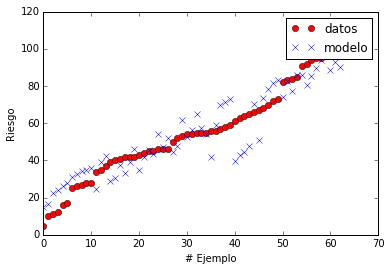

In [151]:
### SOLUCIÓN
X = testDf[['SRR','FRR','SUR','ERR']]
y = testDf['RISK']
model = LinearRegression()
model.fit(X, y)
y_hat = model.predict(X)
print(model.score(X, y))
plt.figure()
idx_sort = y.argsort()
plt.plot(range(len(idx_sort)), y[idx_sort], 'ro')
plt.plot(range(len(idx_sort)), y_hat[idx_sort], 'bx')
plt.legend(['datos', 'modelo'])
plt.ylabel('Riesgo')
plt.xlabel('# Ejemplo')

## Regresión logística
<br>
<font size="4">
<p>
Entrenar un modelo de regresión logística para el conjunto de datos [Apple juice](http://www.stat.ufl.edu/~winner/data/apple_juice.txt). El objetivo es determinar la presencia/ausencia del crecimiento de la bacteria CRA7152 en jugo de manzana, teniendo en cuenta las variables de entrada pH (PH), [Brix](https://es.wikipedia.org/wiki/Grado_Brix) (BRIX), temperatura (TEMP) y concentración de nisina (NIS).
<p>
</font>

In [152]:
data=StringIO("""PH,BRIX,TEMP,NIS,GROWTH
5.5,70,50,11,0
5.5,70,43,19,0
5.5,50,43,13,1
5.5,50,35,15,1
5.5,30,35,13,1
5.5,30,25,11,0
5.5,0,50,19,0
5.5,0,25,15,1
3.5,70,43,15,0
3.5,70,35,11,0
3.5,50,50,13,0
3.5,50,35,19,0
3.5,30,50,11,0
3.5,30,43,15,0
3.5,0,25,19,0
5,70,25,15,0
5,70,25,13,0
5,50,50,15,1
5,50,25,19,0
5,30,43,19,0
5,30,43,11,1
5,0,50,13,1
5,0,35,11,1
4,70,50,19,0
4,70,35,13,0
4,50,43,11,0
4,50,25,11,0
4,30,50,15,1
4,30,35,19,0
4,30,25,13,0
4,0,43,15,1
4,0,43,13,1
3.5,0,35,11,0
4,0,35,11,1
5,0,43,11,1
5.5,70,50,19,0
3.5,0,25,11,0
5.5,70,50,11,0
5.5,70,43,19,0
5.5,50,43,13,1
5.5,50,35,15,1
5.5,30,35,13,1
5.5,30,25,11,0
5.5,0,50,19,0
5.5,0,25,15,1
3.5,70,43,15,0
3.5,70,35,11,0
3.5,50,50,13,0
3.5,50,35,19,0
3.5,30,50,11,0
3.5,30,43,15,0
3.5,0,25,19,0
5,70,25,15,0
5,70,25,13,0
5,50,50,15,1
5,50,25,19,0
5,30,43,19,0
5,30,43,11,1
5,0,50,13,1
5,0,35,11,1
4,70,50,19,0
4,70,35,13,0
4,50,43,11,0
4,50,25,11,0
4,30,50,15,1
4,30,35,19,0
4,30,25,13,0
4,0,43,15,1
4,0,43,13,1
3.5,0,35,11,0
4,0,35,11,1
5,0,43,11,1
5.5,70,50,19,0
3.5,0,25,11,0
""")

df = pd.read_csv(data, sep=",")

<br>
<font size="4">
<p>Resuelva los siguientes puntos:</p>
</font>
 1. Extraiga las variables de entrada $X$ y la variable de salida $y$
 2. Entrene un modelo de clasificación
 3. Reporte el valor de error
 4. Visualice las predicciones. Use PH y BRIX como variables.

0.72972972973


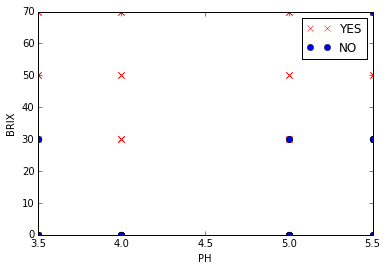

In [153]:
## Solución

X = df[['PH','BRIX','TEMP','NIS']]
y = df['GROWTH']
model = LogisticRegression()
model.fit(X, y)
print(model.score(X, y))
y_hat = model.predict(X)

plt.figure()
icons = ['rx', 'bo']
for i, icon in enumerate(icons):
    samples = y_hat == i
    plt.plot(X['PH'][samples], X['BRIX'][samples], icon)
plt.legend(['YES', 'NO'])
plt.xlabel('PH')
plt.ylabel('BRIX')

# Quiz

1. Si usted quisiera predecir si una determinada compañía se declarará en quiebra dentro de los próximos 7 días. ¿Trataría esto como una clasificación o un problema de regresión?
 - Regresión
 - **Clasificación**
2. Si usted desea predecir el comportamiento de una acción en la bolsa de valores basado en el comportamiento histórico de la acción. ¿Qué método utilizaría?
 - Regresión lineal
 - Regresión logística

# Referencias

* Murphy, K. P. (2013). Machine learning: a probabilistic perspective. Cambridge, Mass.: MIT Press.
* Sugiyama, M. (2016). Introduction to statistical machine learning. Waltham, Ma.: Morgan Kaufmann, Elsevier.
* Wittenauer, J. (2016, October 16). Machine Learning Exercises In Python, Part 3. Retrieved July 27, 2017, from http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-3/
* Logistic regression with Python. (2016, August 26). Retrieved July 27, 2017, from http://librimind.com/2015/07/logistic-regression-with-python/
